In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from model.data_loader import *

In [3]:
train_pth = 'data/facades_processed/train'
val_pth   = 'data/facades_processed/val'

## Data augmentation

Zoom and horizontal flip

In [4]:
train_generator = ImageDataGenerator(
    rescale=1./255,
    zoom_range=[0.895, 1.0],
    horizontal_flip=True,
    fill_mode='constant',
    data_format='channels_last',
    validation_split=0.0
)

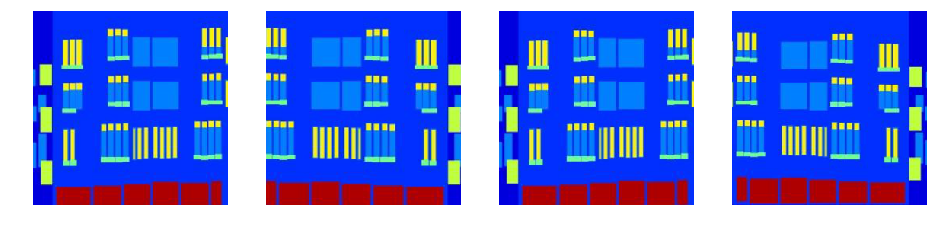

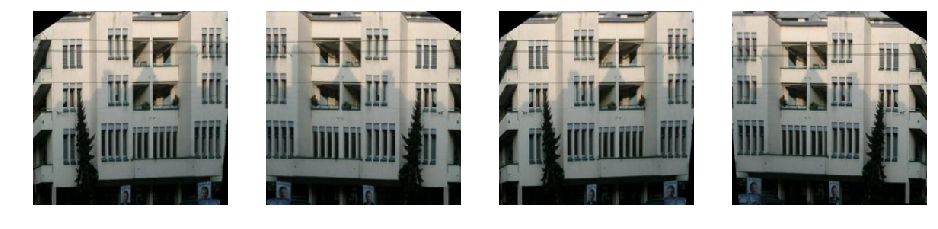

In [5]:
show_augmentation(f'{train_pth}/input/1.jpg', train_generator, n_rows=1)
show_augmentation(f'{train_pth}/target/1.jpg', train_generator, n_rows=1)

In [7]:
train_loader = dataLoader(train_pth, train_generator, batch_sz=1, img_sz=(256, 256))
input_, target = next(train_loader)

Found 400 images belonging to 1 classes.
Found 400 images belonging to 1 classes.


In [8]:
import tensorflow as tf
import tensorflow.keras.backend as K

In [17]:
print(input_.shape, target.shape)

(1, 256, 256, 3) (1, 256, 256, 3)


In [18]:
def mean_absolute_error(y_true, y_pred):
    return K.mean(K.abs(y_true - y_pred), axis=-1)

def L1_loss(y_true, y_pred):
    return tf.reduce_mean(tf.abs(y_true - y_pred))

In [19]:
mean_absolute_error(target, input_)

<tf.Tensor 'Mean_5:0' shape=(1, 256, 256) dtype=float32>

In [20]:
L1_loss(target, input_)

<tf.Tensor 'Mean_6:0' shape=() dtype=float32>